In [53]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
reg1 = DecisionTreeRegressor(max_depth=1)
reg2 = DecisionTreeRegressor(max_depth=2)

X = np.linspace(-2, 2, 7).reshape(-1, 1)
y = X ** 3

reg1.fit(X, y)
reg2.fit(X, y)

# Predictions
X_test = np.arange(-2.0, 2.0, 0.1)[:, np.newaxis]
y_1 = reg1.predict(X_test)
y_2 = reg2.predict(X_test)

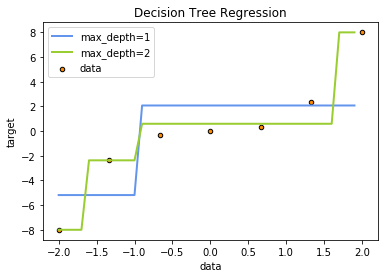

In [55]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show();

# Heart Disease Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
df = pd.read_csv('mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Convert `age` to be in years:

In [72]:
df['age'] = round(df['age'] / 365)

In [73]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


# One-Hot Encoding (aka dummy encoding)

What are the unique values for `chol` and `gluc` in our dataset?

In [25]:
df.gluc.unique()

array([1, 2, 3], dtype=int64)

In [26]:
df.cholesterol.unique()

array([1, 3, 2], dtype=int64)

Perform one-hot encoding using `get_dummies` from Pandas:

- if we don't get to it, always ask yourself if you should use the `drop_first=T` argument to get around problems with collinearity. See this [thread](https://github.com/pandas-dev/pandas/issues/12042) to witness the birth of this argument.

In [60]:
pd.get_dummies(df.cholesterol, prefix='chol', prefix_sep='_').head()

pd.get_dummies(data=df.gluc, prefix='gluc', prefix_sep='_').head()

,gluc_1,gluc_2,gluc_3
id,,,
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Now that you know how to create these dummy variables, add them to the dataframe.

In [74]:
df = pd.concat([df,
                 pd.get_dummies(df.cholesterol, prefix='chol', prefix_sep='_'),
                  pd.get_dummies(df.gluc, 'gluc', '_')],
                   axis=1)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,1,0,0,1,0,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,0,0,1,1,0,0
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0,0,1,1,0,0
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1,0,0,1,0,0
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,1,0,0,1,0,0


Drop the original `cholesterol` and `gluc` columns

In [75]:
df.drop(['cholesterol', 'gluc'], axis = 1, inplace = True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0
1,55.0,1,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0
2,52.0,1,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0
3,48.0,2,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0
4,48.0,1,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0


## Create training and holdout sets

In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [76]:
X = df.drop(['cardio'], axis = 1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

## Train the model

In [77]:
clf = DecisionTreeClassifier(max_depth=3, random_state=17)

heart_fit = clf.fit(X_train, y_train)

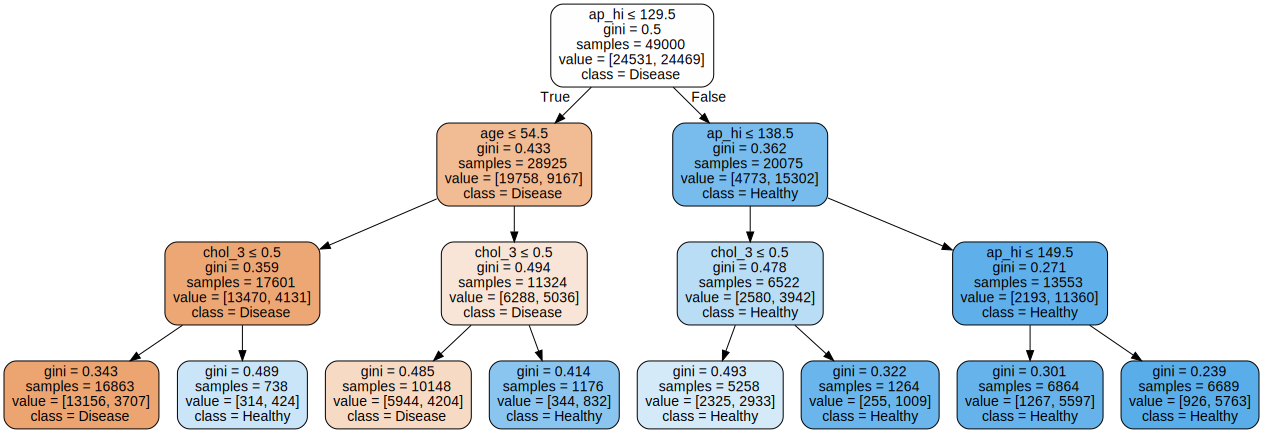

In [78]:
import graphviz

dot_data = export_graphviz(heart_fit, out_file=None, feature_names=X.columns, class_names=['Disease', 'Healthy'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Predictions and Accuracy

In [82]:
# Make predictions

pred = heart_fit.predict(X_test)

In [83]:
accuracy_score(y_true=y_test, y_pred=pred)

0.7212857142857143

In [84]:
classification_report(y_test, pred)

'             precision    recall  f1-score   support\n\n          0       0.70      0.77      0.73     10490\n          1       0.75      0.67      0.71     10510\n\navg / total       0.72      0.72      0.72     21000\n'